                                                                                                                                                                        ABHISHEK KASHYAP
# Movies Data Analysis

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [Data Types](#section301)<br/>
    - 3.2 [Head of data](#section302)<br/>
    - 3.3 [Description of data](#section303)<br/>
    - 3.4 [Pandas Pre Profiling](#section304)<br/>
    - 3.5 [Initial observations](#section305)<br/>
    - 3.6 [Final observations](#section306)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Missing data and its imputation](#section402)<br/>
        - 4.2.1 [Replace Zero Revenue to NaN](#section40201)<br/>
        - 4.2.1 [Imputation of missing data in revenue](#section40202)<br/>
    - 4.3 [Split and Explod column](#section403)<br/>
        - 4.3.1 [Define a function for exploding string into individual rows](#section40301)<br/>
        - 4.3.2 [Spliting and Exploding genre and actor column](#section40302)<br/>
        - 4.3.3 [Drop Columns of no use](#section40303)<br/>
    - 4.4 [Pandas Post Profiling](#section404)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Corelation between numerical data](#section501)<br/>
    - 5.2 [Votes vs Revenue](#section502)<br/>
    - 5.3 [Year vs Revenue](#section503)<br/>
    - 5.4 [Rating vs Metascore](#section504)<br/>
    - 5.5 [Votes vs Metascore](#section505)<br/>
    - 5.6 [Runtime vs Revenue](#section506)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [Which year contribute the highest and lowest revenue and why?](#section601)<br/>
         - 6.1.1 [Higest revenue year analysis](#section60101)<br/>
         - 6.1.2 [Lowest revenue year analysis](#section60102)<br/>
     - 6.2 [Genre with Maximum Revenue?](#section602)<br/>
     - 6.3 [Actor Generating High Revenue](#section603)<br/>
     - 6.4 [Director Generating High Revenue?](#section604)<br/>
     - 6.5 [Movies with high revenue lies in which rating frequecy?](#section605)<br/>
     - 6.6 [Desipite of low rating ( i.e. 3-5 ), movies generated respectively high revenue, Why?](#section606)<br/>
     - 6.7 [Which length of Movies having high revenue ?](#section607)<br/>
- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement

"This is a dataset of movies released in 10 years from 2006 to 2016 along with various attributed" We have to identify important aspect as is revenue is related with any other attributed in the data and may be particular type of movies or particular actors/directors are most popular among public"
<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis project of movies dataset which include loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "1000 Movies Data"
- __Sponsoring Organization__: Open Source
- __Year__: 2017
- __Description__: "collection of 1000 movied released between 2006 to 2016 

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

<a id=section2></a> 
### 2. Load the packages and data 

In [84]:
import sys                                                          # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline    

import pandas_profiling                                             # Get a quick overview for all the variables using pandas_profiling

import warnings                                                     # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 



pd.set_option('display.max_columns', 100)                           # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                    # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

moviesdata = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")                       # Load in the dataset as mh

____________________________

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand the variable in data<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 
#### 3.1 Data Type

In [2]:
moviesdata.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

<a id=section302></a> 
#### 3.2 Head of data

In [3]:
moviesdata.head() 

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section303><a/>
#### 3.3 Description of data

In [4]:
moviesdata.describe(include = 'all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",In the aftermath of a massive earthquake in Ca...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


#### Observations from description:

- There is record of 1000 movies released between 2006 and 2016. There is discrepancies in Vote Column, Total Count of Vote is approx 1.00000 which is not possible and also the maximum value is showing ~1.7919 while in head data there are values in Lakhs.
- It is likely impossible to have Zero Revenue for any movies.

- Missing Values in columns:
    - Revenue : 128 ; 
    - Metascore : 64

<br><br>

<a id=section304></a> 
#### 3.4 Pandas Pre Profiling

In [5]:
profile = pandas_profiling.ProfileReport(moviesdata)
profile.to_file(outputfile="moviesdatapreprofileing.html")           # HTML file will be downloaded to your workspace

<a id=section305></a> 
#### 3.5. Initial observations:

- Summary of data types in this dataset:
 - <em>Numeric</em>:
   - <em>Integer</em>: Rank, Year, Runtime and Votes
   - <em>Float</em>: Rating, Revenue, Metascore
 - <em>Object</em>: Everything else
- There is strong corelation between followings:
    - Rating and Metascore
    - Rating and Votes
    - Votes and Revenue

#### Explore the numeric variable Rank to confirm whether all values are within a reasonable range and if any are NaN. As Count is 1000 and Unique Value should be 1000, but here it is NaN

In [6]:
print("'Rank'")                                                                
print("Minimum value: ", moviesdata["Rank"].min())
print("Maximum value: ", moviesdata["Rank"].max())
print("How many values are NaN?: ", pd.isnull(moviesdata['Rank']).sum())

'Rank'
Minimum value:  1
Maximum value:  1000
How many values are NaN?:  0


<a id=section306></a> 
#### 3.7. Final observations 

- Variables to transform prior to analysis:
- Drop Title and Description as it is of no use (all unique value)
 - Standardize all column headers to lower case (to prevent typos!) and Revenue (Millions) & Runtime (Minutes) as only revenue & runtime respectively
 - Decision to handle NaN values for __Revenue__ and __Metascore__
  - __Genre__: Split and Explod
  - __Actors__: Split and Explod

__________________________________________

<a id=section4></a> 
### 4. Data Normalization

<a id=section401><a/>

### 4.1. Standardize all column headers to lower case and change header name for Runtime (Minutes) and Revenue (Millions)

In [7]:
moviesdata.columns = map(str.lower, moviesdata.columns)
moviesdata=moviesdata.rename(columns={'runtime (minutes)':'runtime','revenue (millions)':'revenue'})
                                                                               
moviesdata.dtypes

rank             int64
title           object
genre           object
description     object
director        object
actors          object
year             int64
runtime          int64
rating         float64
votes            int64
revenue        float64
metascore      float64
dtype: object

<a id=section403></a>
### 4.2 Missing Data and its imputation

<a id=section40201></a>
#### 4.2.1 Replace zero revenue to NaN

In [8]:
md = moviesdata.replace(0, np.NaN)

In [9]:
#missing data
total = md.isnull().sum().sort_values(ascending=False)
percent = (md.isnull().sum()/md.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

             Total  Percent
revenue        129    0.129
metascore       64    0.064
votes            0    0.000
rating           0    0.000
runtime          0    0.000
year             0    0.000
actors           0    0.000
director         0    0.000
description      0    0.000
genre            0    0.000
title            0    0.000
rank             0    0.000


<a id=section40202></a>
#### 4.2.2 Imputation of missing data in revenue

Replaced missing value of revenue column with year wise mean revenue

In [10]:
md['revenue'].fillna(md.groupby(["year"])["revenue"].transform(np.mean), inplace=True)

Replaced missing value of metascore column mean 

In [11]:
md['metascore'].fillna((md['metascore'].mean()), inplace=True)

Check Missing Data for confirmation

In [12]:
total = md.isnull().sum().sort_values(ascending=False)
percent = (md.isnull().sum()/md.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

             Total  Percent
metascore        0      0.0
revenue          0      0.0
votes            0      0.0
rating           0      0.0
runtime          0      0.0
year             0      0.0
actors           0      0.0
director         0      0.0
description      0      0.0
genre            0      0.0
title            0      0.0
rank             0      0.0


As there is descripency in vote column

In [13]:
print("'votes'")                                                                
print("Minimum value: ", md["votes"].min())
print("Maximum value: ", md["votes"].max())
print("How many values are NaN?: ", pd.isnull(md['votes']).sum())
print("Total count of votes: ",md.votes.count())

'votes'
Minimum value:  61
Maximum value:  1791916
How many values are NaN?:  0
Total count of votes:  1000


<a id=section403></a>
### 4.3. Split and Explod 'genre' and 'actors' column

<a id=section40301></a>
#### 4.3.1 Define a function for exploding string into individual rows

In [14]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

<a id=section40302></a>
#### 4.3.2 Spliting and Exploding genre and actor column

In [15]:
md.genre = md.genre.str.split(',')
md=explode(md,['genre'])

In [16]:
md.actors = md.actors.str.split(',')
md=explode(md,['actors'])

<a id=section40303></a>
#### 4.3.3 Drop Columns of no use

In [17]:
md.drop('title', axis=1, inplace=True)
md.drop('description', axis=1, inplace=True)
md.drop('rank', axis=1, inplace=True)
md.head()

,genre,director,actors,year,runtime,rating,votes,revenue,metascore
0,Action,James Gunn,Chris Pratt,2014,121,8.1,757074,333.13,76.0
1,Action,James Gunn,Vin Diesel,2014,121,8.1,757074,333.13,76.0
2,Action,James Gunn,Bradley Cooper,2014,121,8.1,757074,333.13,76.0
3,Action,James Gunn,Zoe Saldana,2014,121,8.1,757074,333.13,76.0
4,Adventure,James Gunn,Chris Pratt,2014,121,8.1,757074,333.13,76.0


____________________________________

<a id=section404></a>
### 4.4 Pandas Post Profiling

In [18]:
post_profile = pandas_profiling.ProfileReport(md)
post_profile.to_file(outputfile="moviesdatapostprofileing.html")

___________________________________________

<a id=section5></a>
### 5. Identify patterns in the data

<a id=section501></a> 
#### 5.1 Corelation between numerical data

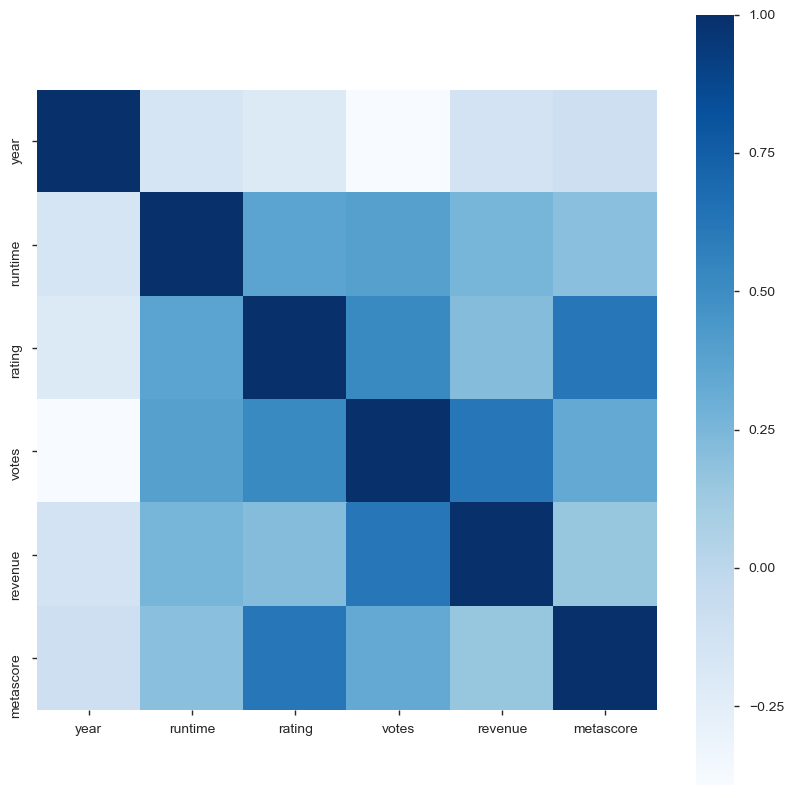

In [35]:
features_correlation = md.corr()
plt.figure(figsize=(10,10))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observation:
- __runtime__ is __mildly__ correlated with __rating__ and __votes__
- __rating__ is correlated with __metascore__ and __votes__
- __votes__ is __highly__ correlated with __revenue__

<a id=section502></a> 
#### 5.2 votes vs. revenue

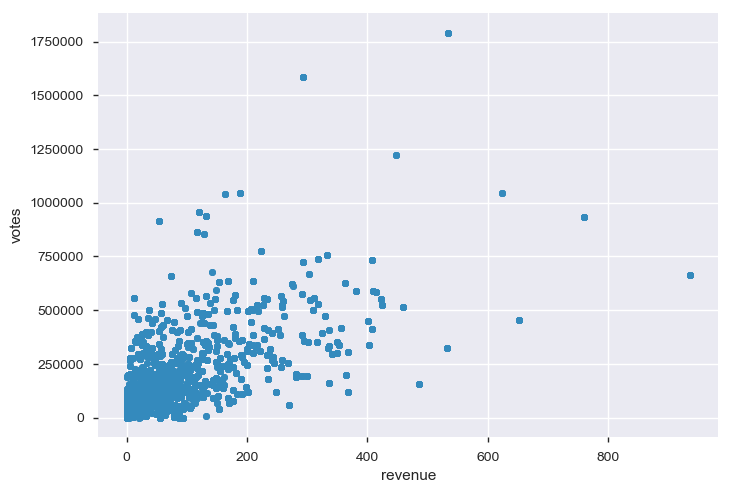

In [37]:
md.plot.scatter(x='revenue', y='votes')

#### Observation:
Most of the movies have votes <=25000 and revenue <=100 Mn

<a id=section503></a>
#### 5.3 Year vs Revenue

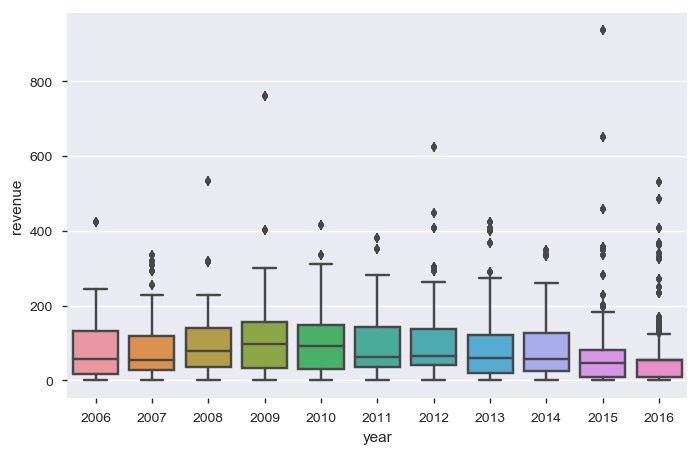

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x='year', y= 'revenue', data = md)

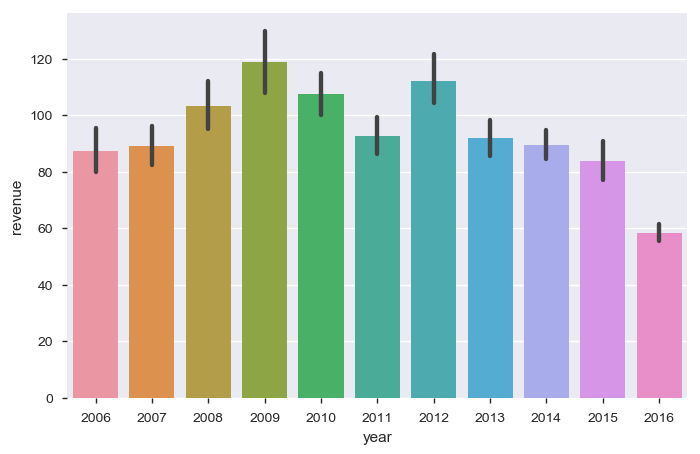

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='revenue',data= md)

#### Observation

- In 2009 and 2010, 50% movies earned between 50~150Mn also median revenue are also maximum.
- From 2015, very high grossing movies started increasing while overall performance become low

<a id=section504></a>

#### 5.4 Rating vs Metascore

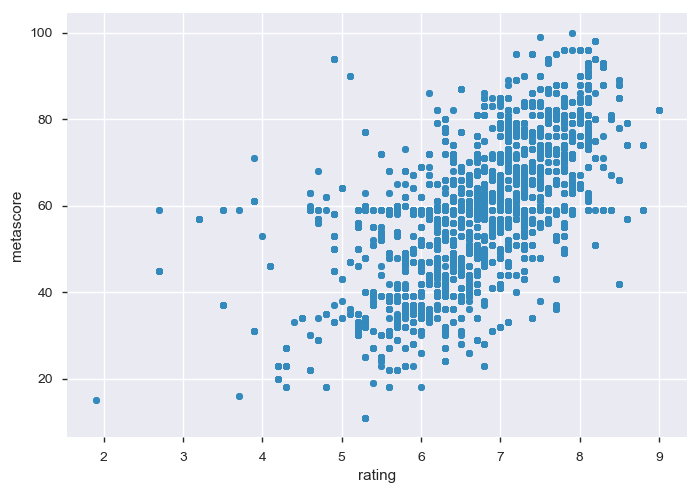

In [44]:
md.plot.scatter(x='rating', y='metascore')

#### Observation:
For most of the movies __metascore__ increases with __rating__

<a section505></a>

#### 5.5 Votes vs Metascore

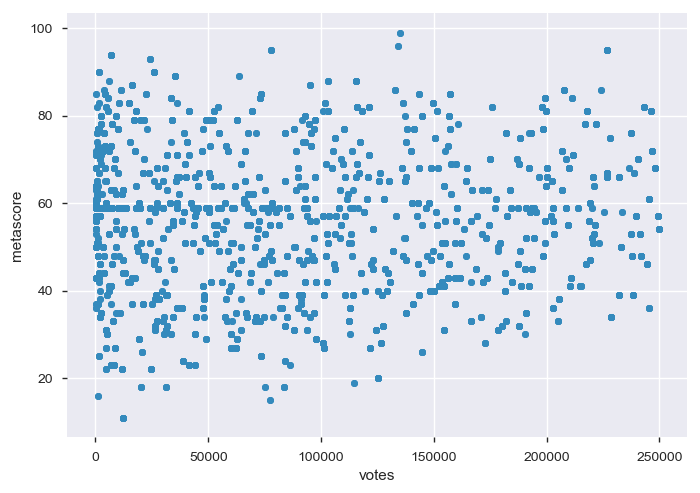

In [45]:
md[md['votes'] < 250000].plot.scatter(x='votes', y='metascore')

#### Observation:
Most of the movies have <250000 votes, hence checked distribution only for movies under 250000 votes

<a section506></a>

#### 5.6 Runtime vs Revenue

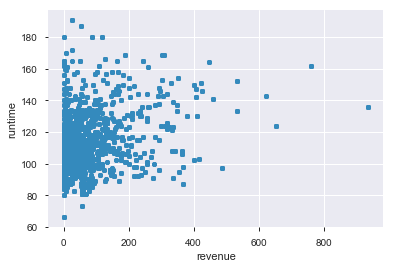

In [133]:
md.plot.scatter(x='revenue', y='runtime')

#### Observation
Maximum revenue is generated by movies of duration 90 to 130 minutes

________________________

<a id=section6></a>
### 6. Analysis through questions

<a id=section601><a/>
    
#### 6.1 Which year contribute the highest and lowest revenue and why?

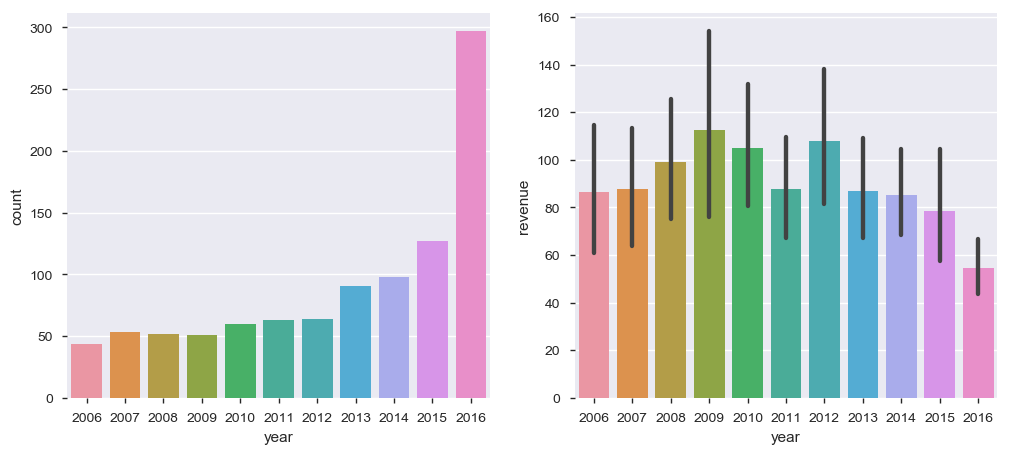

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
#moviesdata['year'].value_counts().head(10).plot.bar()
#plt.plot(x, y, 'r--') # More on color options later
sns.countplot(x='year',data= moviesdata)
plt.subplot(1,2,2)
sns.barplot(x='year',y='revenue',data= moviesdata);

#### Observation:
- Inspite of having maximum movies in 2016, it is lowest revenue
- Number of movies increases with time
- In 2009, Average earning of movies is maximum as approx 50 Movies scored the maximum revenue

<a id=section60101><a/>
    
#### 6.1.1 Higest revenue year analysis

In [22]:
md2009=md[md['year']==2009]

In [23]:
actors_rev = md2009.pivot_table(values=['revenue'], 
                      index='actors',
                      aggfunc='sum')
actors_revdf=pd.DataFrame(actors_rev).reset_index()
actors_revdf=actors_revdf.sort_values(by='revenue',ascending=False)[:5]

director_rev = md.pivot_table(values=['revenue'], 
                      index='director',
                      aggfunc='sum')
director_revdf=pd.DataFrame(director_rev).reset_index()
director_revdf=director_revdf.sort_values(by='revenue',ascending=False)[:5]

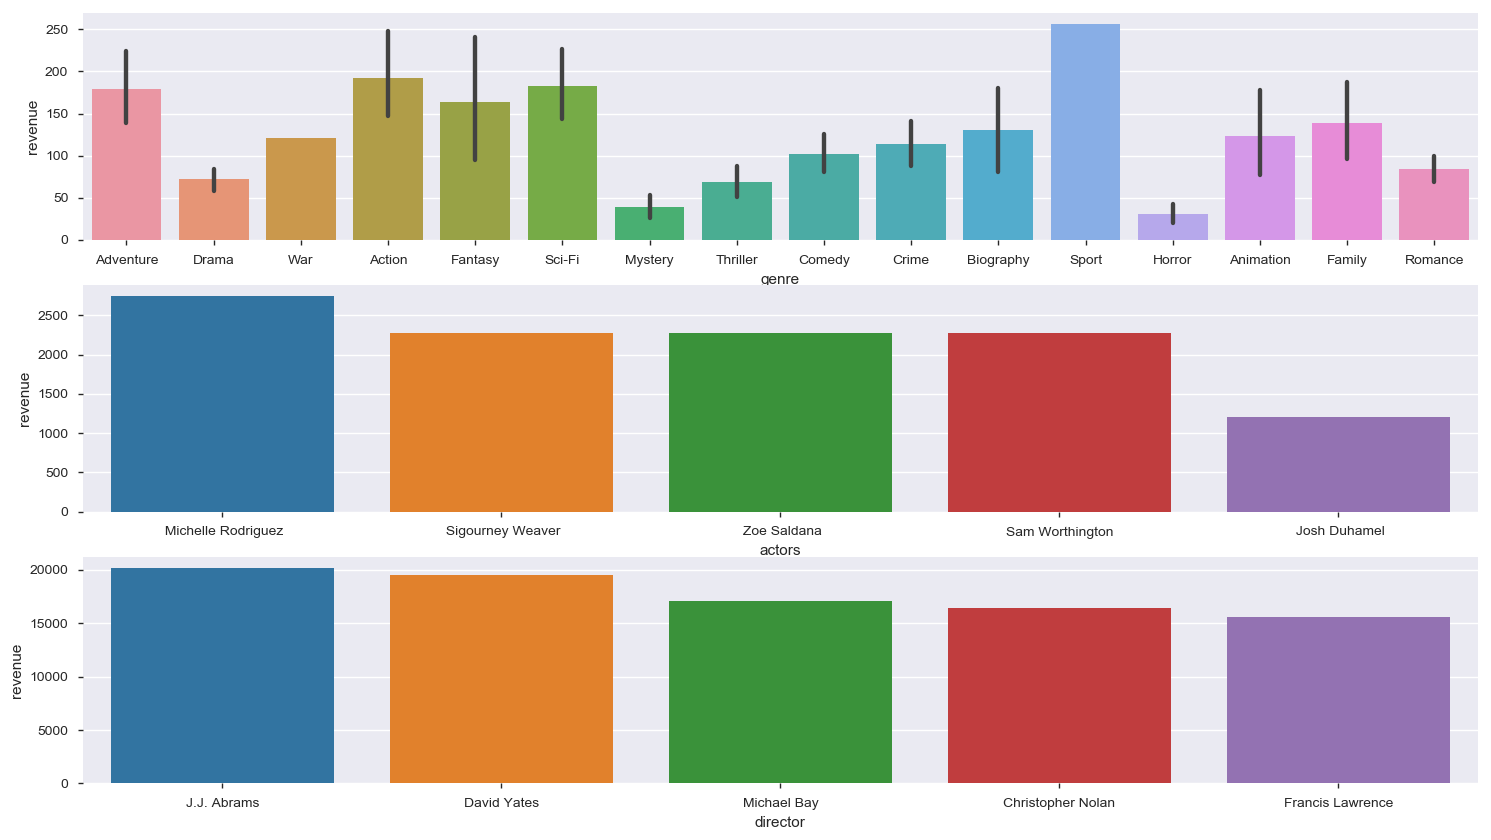

In [24]:
plt.figure(figsize=(18,10))
plt.subplot(3,1,1)
sns.barplot(x='genre',y='revenue',data= md2009)
plt.subplot(3,1,2)
sns.barplot(x='actors',y='revenue',data= actors_revdf)
plt.subplot(3,1,3)
sns.barplot(x='director',y='revenue',data= director_revdf)

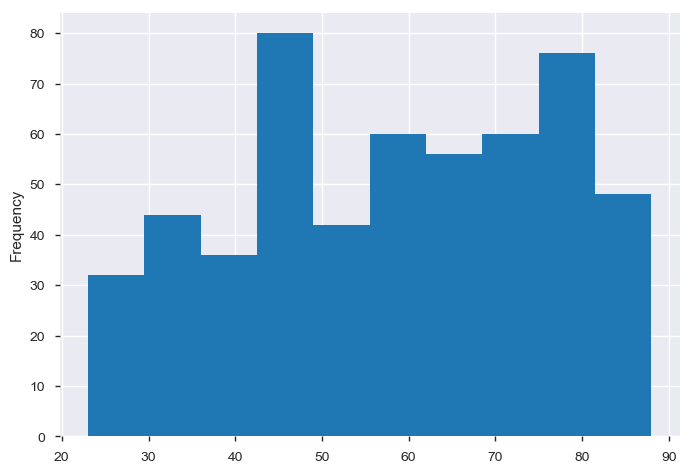

In [25]:
md2009['metascore'].plot.hist()

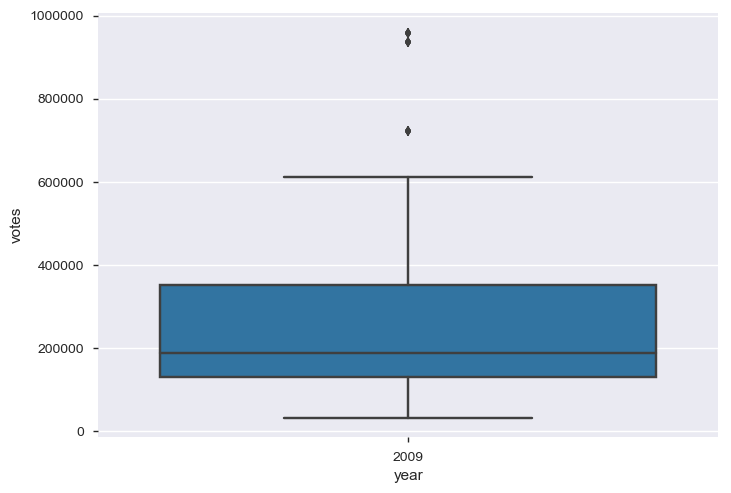

In [26]:
sns.boxplot(x='year', y= 'votes', data = md2009)

<a id=section60102><a/>
    
#### 6.1.2 Lowest revenue year analysis

In [27]:
md2016=md[md['year']==2016]

In [28]:
actors_rev16 = md2016.pivot_table(values=['revenue'], 
                      index='actors',
                      aggfunc='sum')
actors_revdf16=pd.DataFrame(actors_rev16).reset_index()
actors_revdf16=actors_revdf16.sort_values(by='revenue',ascending=False)[:5]

director_rev16 = md.pivot_table(values=['revenue'], 
                      index='director',
                      aggfunc='sum')
director_revdf16=pd.DataFrame(director_rev16).reset_index()
director_revdf16=director_revdf16.sort_values(by='revenue',ascending=False)[:5]

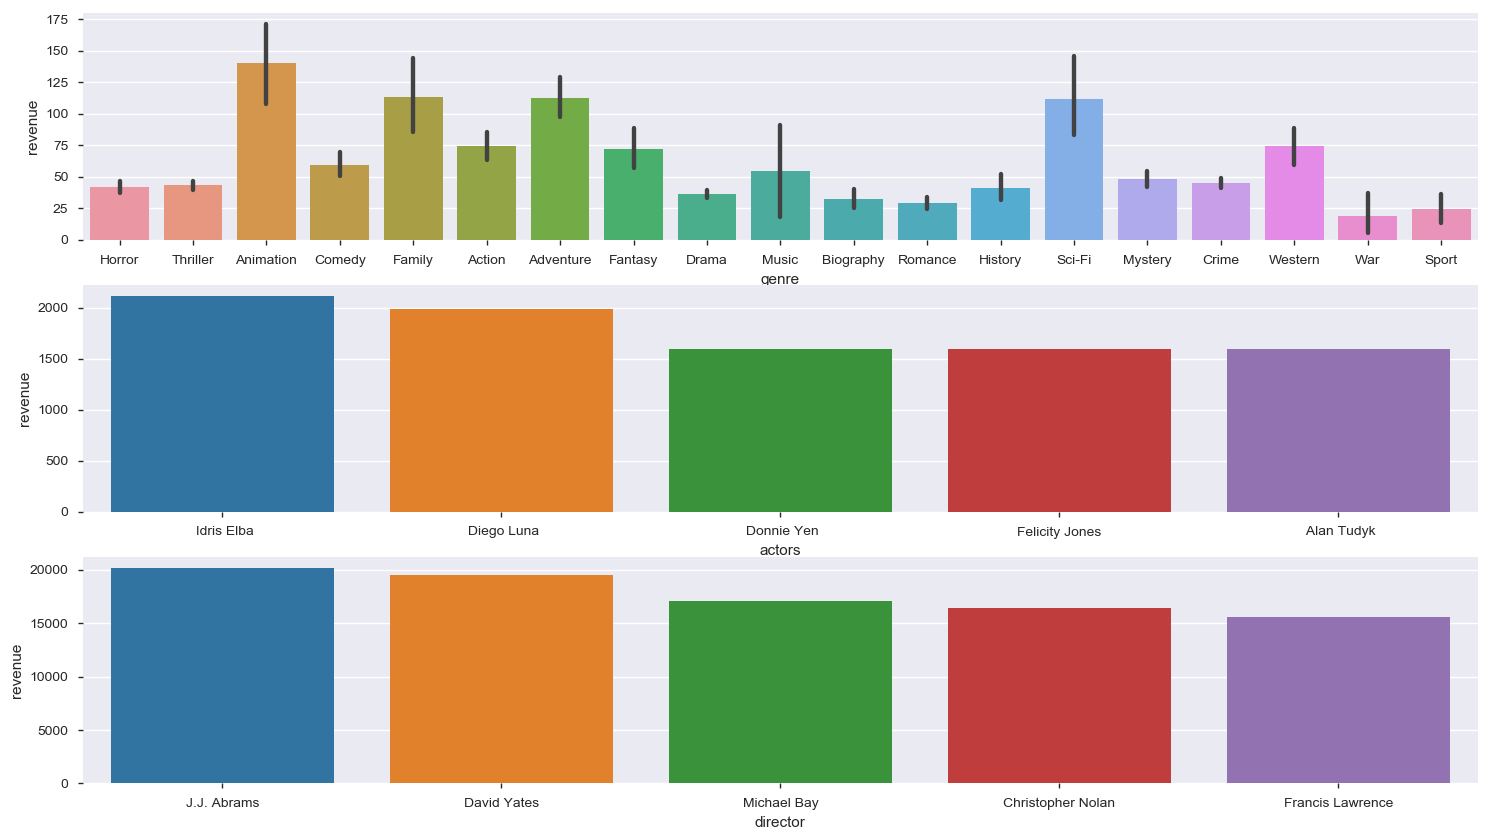

In [29]:
plt.figure(figsize=(18,10))
plt.subplot(3,1,1)
sns.barplot(x='genre',y='revenue',data= md2016)
plt.subplot(3,1,2)
sns.barplot(x='actors',y='revenue',data= actors_revdf16)
plt.subplot(3,1,3)
sns.barplot(x='director',y='revenue',data= director_revdf16)

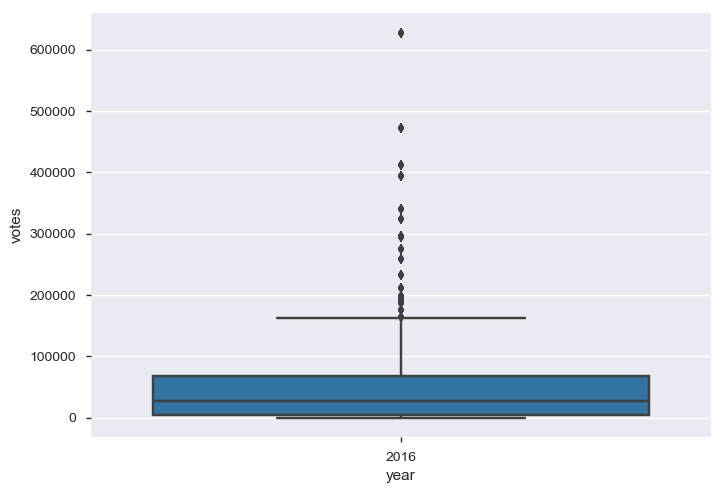

In [30]:
sns.boxplot(x='year', y= 'votes', data = md2016)

#### Observation:
- Number of movies increases with time
- Inspite of having maximum movies in 2016, it is lowest revenue
- In 2009, Average earning of movies is maximum as approx 50 Movies scored the maximum revenue
- Revenue is strongly corelated with votes
    - In 2009, most of the votes lies between 1500000 to 3500000 and median score is ~2000000 while in 2016,most of the votes lies between 0 to 800000 and median score is ~300000

<a id=section602><a/>
    
#### 6.2 Genre with Maximum Revenue?

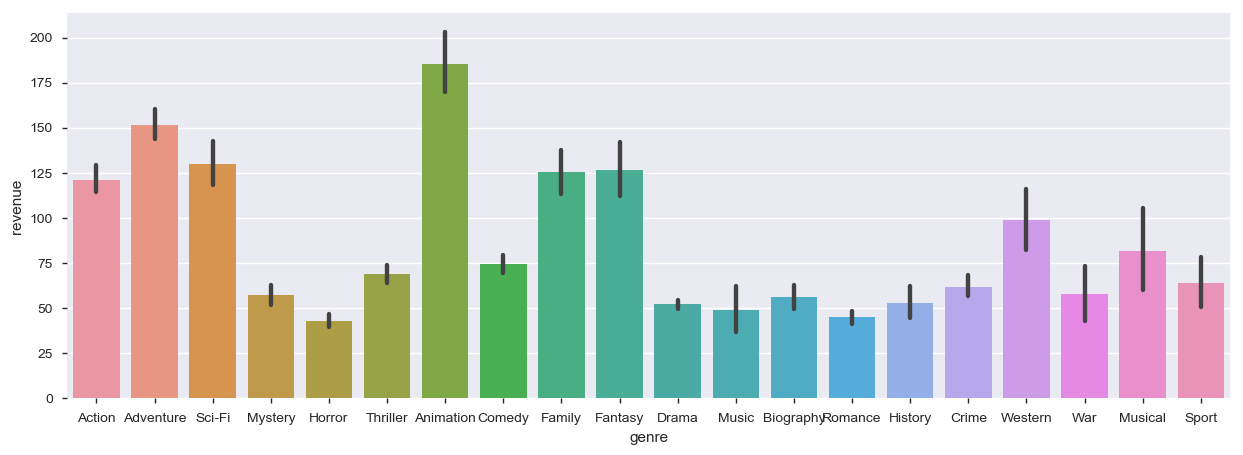

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(x='genre',y='revenue',data= md)

#### Observation:
- Overall Animation movie generated more revenue followed by Adventure movies

<a id=section603><a/>
    
#### 6.3 Actor Generating High Revenue?

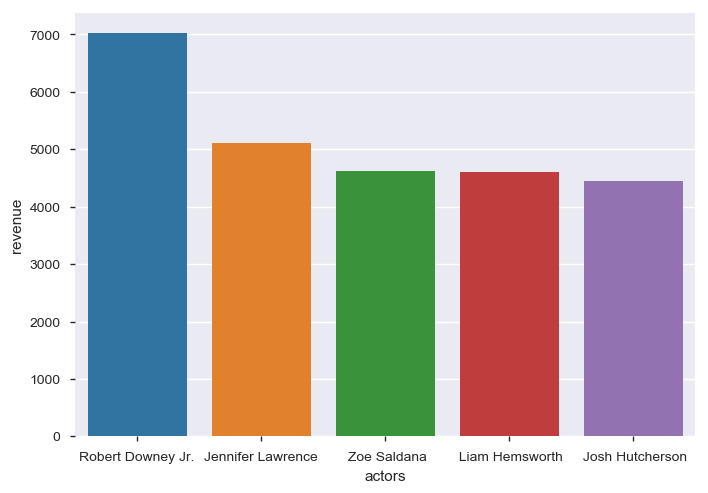

In [78]:
actors = md.pivot_table(values=['revenue'], 
                      index='actors',
                      aggfunc='sum')
actors_df=pd.DataFrame(actors).reset_index()
actors_df=actors_df.sort_values(by='revenue',ascending=False)[:5]
sns.barplot(x='actors',y='revenue',data= actors_df)

#### Observation:
Robert Downey Jr. generated the highest revenue

<a id=section604><a/>
    
#### 6.4 Director Generating High Revenue?

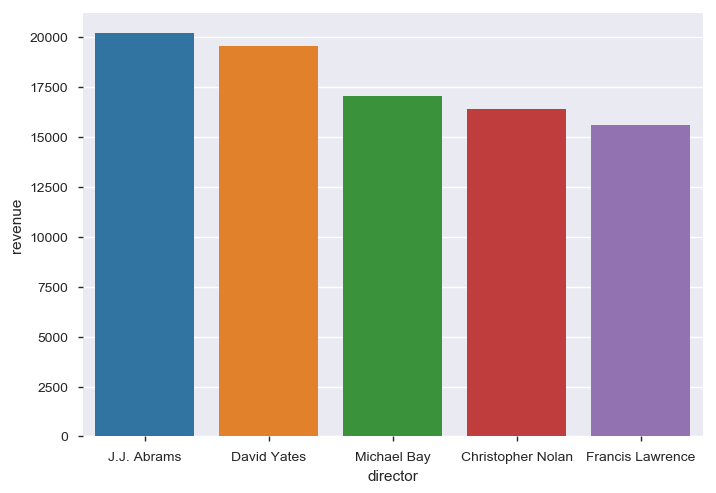

In [80]:
director = md.pivot_table(values=['revenue'], 
                      index='director',
                      aggfunc='sum')
director_df = pd.DataFrame(director).reset_index()
director_df=director_df.sort_values(by='revenue',ascending=False)[:5]

sns.barplot(x='director',y='revenue',data= director_df)

#### Observation:
Gross revenue of movies directed by __J.J. Abrams__ is maximum followed by David Yated among all directors

<a id=section605><a/>
    
#### 6.5 Movies with high revenue lies in which rating frequecy?

In [85]:
md['rating_Group'] = pd.cut(md['rating'],
                         [0,1,2,3,4,5,6,7,8,9,10],
                         labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10'], include_lowest=True)

In [121]:
md['runtime_Group'] = pd.cut(md['runtime'],
                         [60,90,120,150,180,210],
                         labels=['60-90 minutes','90-120 minutes','120-150 minutes','150-180 minutes','180-210 minutes'], include_lowest=True)

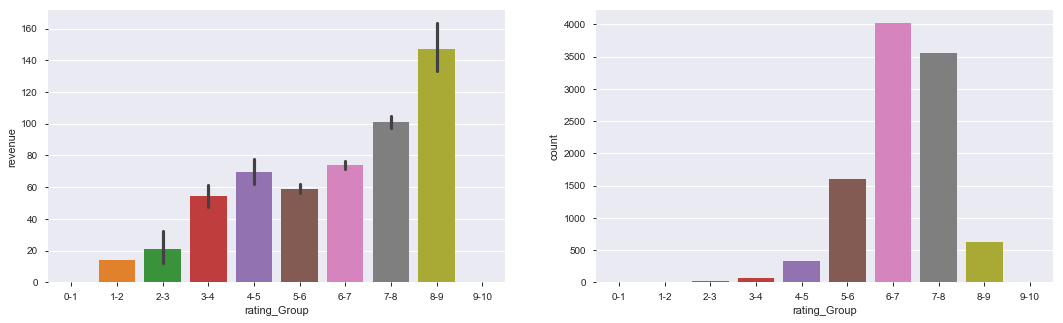

In [94]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.barplot(x='rating_Group',y='revenue',data= md)
plt.subplot(1,2,2)
sns.countplot(x='rating_Group',data= md);

#### Observation:
- Despite of being lesser movies in rating range "8-9", it generated highest revenue and
- Similar Condition is with the movies having rating between "3-5"

<a id=section606><a/>
    
#### 6.6 Desipite of low rating ( i.e. 3-5 ), movies generated respectively high revenue, Why?

In [117]:
mdrating3to5=md[(md['rating']>=3) & (md['rating']<5)]

In [118]:
mdrating3to5.head()

,genre,director,actors,year,runtime,rating,votes,revenue,metascore,assumedvar,rating_Group,runtime_Group
288,Horror,Phillip Guzman,Jocelin Donahue,2016,99,4.7,523,0.01,58.985043,1,4-5,90-120 minutes
289,Horror,Phillip Guzman,Jesse Bradford,2016,99,4.7,523,0.01,58.985043,1,4-5,90-120 minutes
290,Horror,Phillip Guzman,Jesse Borrego,2016,99,4.7,523,0.01,58.985043,1,4-5,90-120 minutes
291,Horror,Phillip Guzman,Lori Petty,2016,99,4.7,523,0.01,58.985043,1,4-5,90-120 minutes
292,Thriller,Phillip Guzman,Jocelin Donahue,2016,99,4.7,523,0.01,58.985043,1,4-5,90-120 minutes


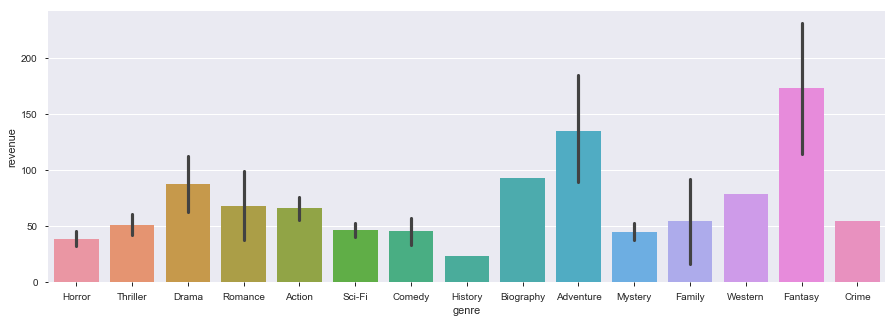

In [108]:
plt.figure(figsize=(15,5))
sns.barplot(x='genre',y='revenue',data=mdrating3to5)

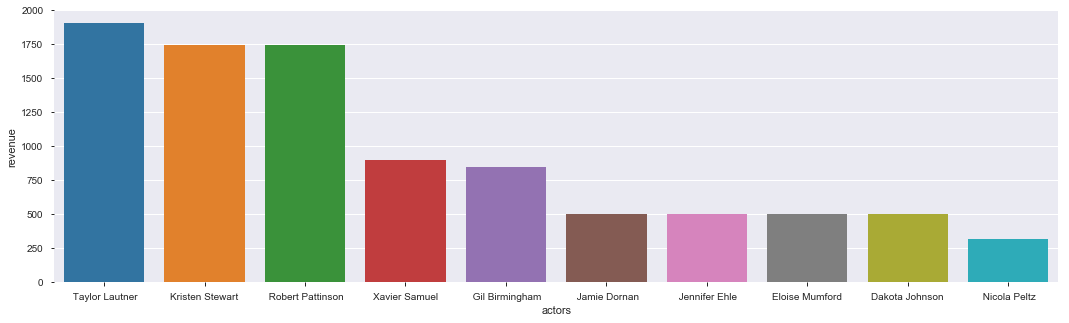

In [115]:
plt.figure(figsize=(18,5))
actors3to5 = mdrating3to5.pivot_table(values=['revenue'], 
                      index='actors',
                      aggfunc='sum')
actors3to5_df=pd.DataFrame(actors3to5).reset_index()
actors3to5_df=actors3to5_df.sort_values(by='revenue',ascending=False)[:10]
sns.barplot(x='actors',y='revenue',data= actors3to5_df)

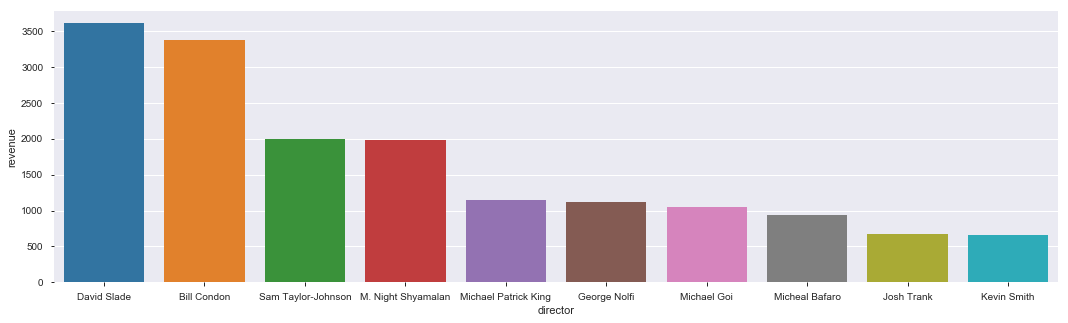

In [114]:
plt.figure(figsize=(18,5))
director3to5 = mdrating3to5.pivot_table(values=['revenue'], 
                      index='director',
                      aggfunc='sum')
director3to5_df = pd.DataFrame(director3to5).reset_index()
director3to5_df=director3to5_df.sort_values(by='revenue',ascending=False)[:10]

sns.barplot(x='director',y='revenue',data= director3to5_df)

#### Observation:
- Despite of having low rating movies earn more due to Actors "Tylor, Kristen and Robert" and movies of director "David and Bill"

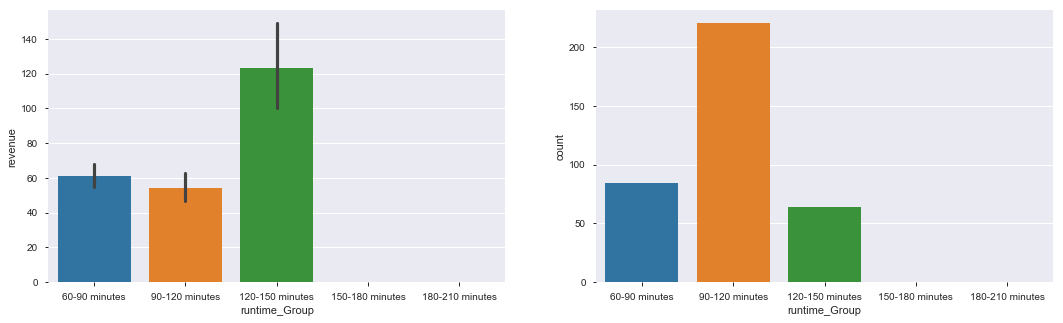

In [139]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.barplot(x='runtime_Group',y='revenue',data=mdrating3to5)
plt.subplot(1,2,2)
sns.countplot(x='runtime_Group',data=mdrating3to5);

#### Observation:
- Despite of having low rating movies earn more due to Actors "Tylor, Kristen and Robert" and movies of director "David and Bill"
- Movies of duration 2~2.5 Hour is more popular in the rating range 3-5

<a id=section607><a/>
    
#### 6.7 Which length of Movies having high revenue ?

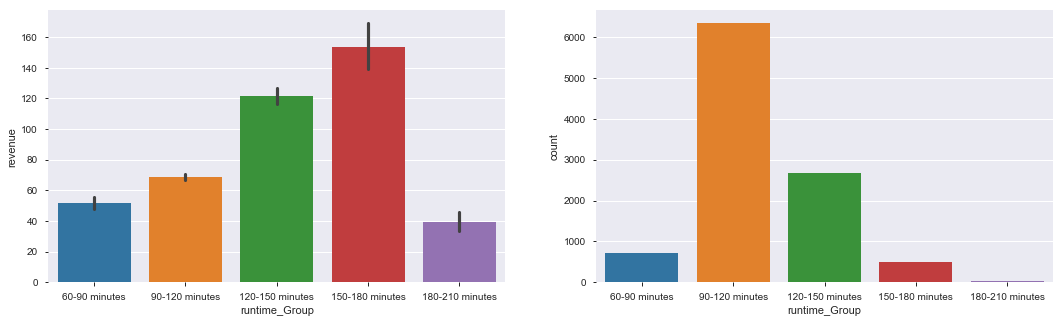

In [125]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.barplot(x='runtime_Group',y='revenue',data= md)
plt.subplot(1,2,2)
sns.countplot(x='runtime_Group',data= md);

#### Observation:
- Average earning of movies of duration 150-180 minutes is very high, while movies of medium length i.e. 90 to 120 minutes having very low average revenue

___________________________________________

<a id=section7><a/>
### Conclusion

- Data of 1000 movies from 2006 to 2016 along with various details of movies(__From: Section 3.3__)
- No of movies in 2016 is maximum but generated lowest revenue. And in 2009, average revenue was maximum(__From: Section 6.1__)
- In 2009, most of the votes lies between 1500000 to 3500000 and median score is ~2000000 while in 2016,most of the votes lies between 0 to 800000 and median score is ~300000(__From: Section 6.1.1 and Section 6.1.2__)
- Maximum revenue generated by Actor __Robert Downey Jr.__ and Director __J.J. Abrams__ (__From: Section 6.3 & 6.4__)
- Despite of being lesser movies in rating range "8-9", it generated highest revenue (__From Section: 6.5__)
- Average earning of movies of duration 150-180 minutes is very high, while movies of medium length i.e. 90 to 120 minutes having very low average revenue (__From Section: 6.7__)